In [2]:
options(warn = -1, scipen = 999)
pacotes <- c("tidyverse","forecast")
for(i in pacotes){
    suppressPackageStartupMessages({
        library(i, character.only = T)
    })
}

In [3]:
url <- "http://www.anfavea.com.br/docs/SeriesTemporais_Autoveiculos.xlsm"
filename <- paste0(getwd(),"/Veiculos.xslm")
download.file(url = url, destfile = filename, mode = "wb")
data <- read_excel(filename, skip = 4)
file.remove(filename)
data <- data[,-seq(7,26,1)]
colnames(data) <- c("Data", "Licenciamento_Tot","Licenciamento_Nac",
                    "Licenciamento_Import",
                    "Produção", "Exportação")
data[,"%_produção_exportada"] <- (data$Exportação/data$Produção)*100
data[,"Crescimento_Producao"] <- matrix(0,nrow = nrow(data), ncol = 1)
for(i in 13:nrow(data)){
  data$Crescimento_Producao[i] <- (data$Produção[i]/data$Produção[i-12]-1)
}

New names:
* `` -> ...1
* `Licenciamento Total` -> `Licenciamento Total...2`
* `Licenciamento Nacionais` -> `Licenciamento Nacionais...3`
* `Licenciamento Importados` -> `Licenciamento Importados...4`
* Produção -> Produção...5
* ...



[1] TRUE

In [4]:
data <- data %>%
  filter(Data <= "2020-07-01")
producao_ts <- ts(data$Produção, end = c(2020,07), frequency = 12)
prod_ar <- auto.arima(producao_ts)
summary(prod_ar)
prod_seas <- seasadj(decompose(producao_ts))
mat <- data.frame(Real = producao_ts, Seasonal = prod_seas)
mat_ts <- ts(mat, end = c(2020,07), frequency = 12)

Series: producao_ts 
ARIMA(2,1,3)(0,0,2)[12] 

Coefficients:
          ar1     ar2      ma1      ma2     ma3    sma1    sma2
      -0.0465  0.6944  -0.3249  -0.8490  0.2505  0.3243  0.1623
s.e.   0.0901  0.0659   0.1003   0.0563  0.0625  0.0416  0.0461

sigma^2 estimated as 342333480:  log likelihood=-8565.75
AIC=17147.5   AICc=17147.69   BIC=17184.59

Training set error measures:
                   ME  RMSE      MAE       MPE    MAPE     MASE          ACF1
Training set 637.3092 18405 10932.63 -14.86576 25.2138 0.582944 -0.0008904549


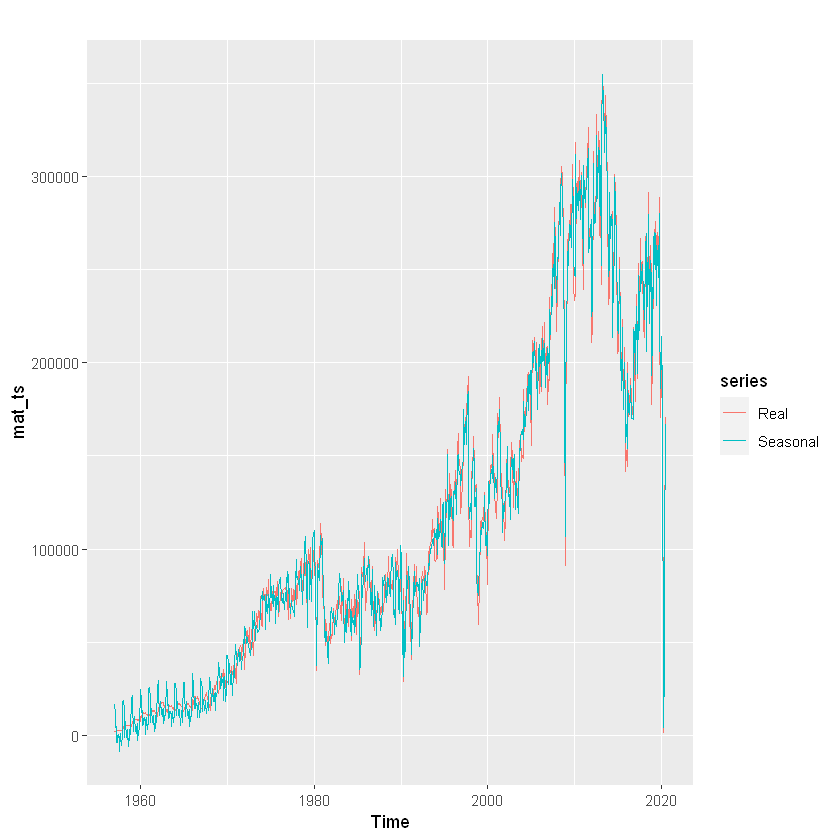

In [7]:
autoplot(mat_ts)